In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import json
import re
from requests.auth import HTTPBasicAuth
from pandas import json_normalize

In [2]:
paper_shop_csv = pd.read_csv("..\data\shop_paper_info.csv")
paper_shop_csv

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,...,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count
0,0,5627890,tinoiseau,7891149,1250485197,1250485197,rubber stamps | paper goods | printables,"Welcome! Here you will find thank you stamps, ...",USD,False,...,I ship via USPS to many countries - please sen...,"My chief concern is customer satisfaction, so ...","I L-O-V-E custom orders, so please contact me ...",NaN,1652140520,False,True,NaN,5.0000,3.0
1,1,6579872,DaydreamPaperStudio,14823706,1319533134,1319533134,"Stylish hand lettered stationery, prints & pap...",You can also check us out on social media:\nIn...,GBP,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,- This Privacy Policy describes how and when I...,NaN,1652182612,False,True,This Privacy Policy describes how and when I c...,4.9444,54.0
2,2,9039454,LettersToYou,43040627,1433462463,1433462463,Letters To You - Custom Hand Lettered & Laser ...,Hello and Welcome! We hope everyone is staying...,USD,False,...,All pieces in our shop are made to order\n\nCA...,"We do not accept returns or exchanges, but all...",**FREE SHIPPING for the LARGE ITEMS IS ONLY AV...,NaN,1651291218,False,True,NaN,4.9809,314.0
3,3,5325270,luciepritchard,6027215,1215602911,1215602911,Lucie Pritchard Design,HELLO and welcome to my shop. \r\nI am a calli...,GBP,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,- This Privacy Policy describes how and when I...,NaN,1652160580,False,True,This Privacy Policy describes how and when I c...,4.9706,34.0
4,4,11704327,M2Originals,72915631,1480455584,1480455584,M2Originals,NaN,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,"I GLADLY ACCEPT RETURNS, EXCHANGES, AND CANCEL...",NaN,NaN,0,False,False,NaN,5.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,2096,17781165,StoriesBySharpies,159534793,1529176714,1529176714,"prints, stationery, and anything lettered",We&#39;ve just rebranded! Expect lots of new a...,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT EXCHANGES\nJust contact me wit...,NaN,NaN,0,False,False,NaN,NaN,NaN
2097,2097,14051083,OverflowByMelissa,18247583,1494443900,1494443900,Overflow by Melissa,If you would like more cards than the quantity...,USD,False,...,NaN,NaN,NaN,NaN,0,False,False,NaN,5.0000,6.0
2098,2098,23565130,YourDayDIY,313931824,1629750978,1629750978,Premium Printable Templates,New digital shower and party invitation templa...,USD,False,...,DIGITAL DOWNLOADS\nYour files will be availabl...,"I DON'T ACCEPT RETURNS, EXCHANGES, OR CANCELLA...","ARE ANY PHYSICAL ITEMS SHIPPED?\nNo, you will ...",NaN,0,False,False,NaN,4.9762,42.0
2099,2099,21820580,ByDesignCustom,102102587,1575872311,1575872311,Create a life you love ✨,Hello! Thank you so much for visiting my shop!...,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND CANCELLATIONS\nJus...,NaN,NaN,0,False,False,NaN,3.0000,1.0


In [3]:
home_shop_csv = pd.read_csv("..\data\shop_home_info.csv")
home_shop_csv

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,...,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count
0,0,6766412,ArtsyQuotes,19840612,1329442479,1329442479,HAND LETTERED HOME DECOR AND GIFTS,Thanks for coming to my hand-lettered print sh...,USD,False,...,Please allow 1-3 business days for custom prin...,"If you are not satisfied with your purchase, p...",NaN,NaN,1652182917,False,True,NaN,NaN,NaN
1,1,8718556,YourAncientName,38954524,1383184890,1383184890,Combining Historic Research With Hand Crafted Art,We&#39;re glad you&#39;re here! \r\n\r\nWhat&#...,USD,False,...,"Currently, I am offering free shipping for ord...","I sometimes have buyer&#39;s remorse too. So,...","ORDER EARLY, 3-4 WEEKS BEFORE YOU NEED A GIFT,...",NaN,1652149923,False,True,NaN,NaN,NaN
2,2,14333509,TrulyScripted,101112796,1483483904,1483483904,Truly Scripted Signs,WELCOME AND PLEASE **NOTE; Many More Listings ...,USD,False,...,NaN,NaN,NaN,NaN,0,False,False,NaN,5.0000,1.0
3,3,18110774,BibleArtPrintables,162226534,1531784310,1531784310,"Printable Baptism Gifts, Scripture Wall Arts, ...",Spring Sale is now on!!\n*We sell digital prin...,CAD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,NaN,NaN,0,False,False,NaN,4.9867,75.0
4,4,15800102,ShawnaClingerman,121658751,1506120055,1506120055,"Heart, Art & Design",VALENTINES DAY SALE 2022! Save 25% Monday 2/14...,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT EXCHANGES\nJust contact me wit...,- Want to read my privacy policy? Check it out...,NaN,0,False,False,Want to read my privacy policy? Check it out o...,4.9818,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2295,10514292,papercasestudio,59805461,1422705835,1422705835,modern calligraphy for events + home,HEY hey—I&#39;m so glad you&#39;re here! We of...,USD,False,...,Shipping times range vary depending on the shi...,Refunds and/or exchanges cannot be accepted on...,We are taking extra precaution to ensure that ...,NaN,1652171582,False,True,NaN,4.7722,158.0
2296,2296,27646547,StellarPrintCo,442590673,1612404666,1612404666,minimalist downloadable art prints and happy v...,Follow on Insta to be the first to see new des...,USD,False,...,DIGITAL DOWNLOADS\nYour files will be availabl...,"I DON'T ACCEPT RETURNS, EXCHANGES, OR CANCELLA...",NaN,NaN,0,False,False,NaN,4.9897,97.0
2297,2297,6961230,BroussArt,22230797,1338770591,1338770591,Printable Party Invitations and More,NaN,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,NaN,NaN,0,False,False,NaN,4.9401,384.0
2298,2298,22100270,HoldenANoteDesigns,9475303,1579386534,1579386534,NaN,NaN,USD,False,...,NaN,NaN,NaN,NaN,0,False,False,NaN,5.0000,12.0


In [4]:
wed_shop_csv = pd.read_csv("..\data\shop_wed_info.csv")
wed_shop_csv

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,...,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count
0,0,7371868,DebiSementelli,17415724,1392845816,1392845816,Debi Sementelli,NaN,USD,False,...,I use CraftHub.me to handle delivery of the di...,Due to the nature of the products I sell – dig...,"When you purchase a one of my fonts, you are b...",NaN,1652924895,False,True,NaN,5.0000,1.0
1,1,6823707,HereAndNowPublishers,17098880,1332497934,1332497934,CalligraphyArts,Welcome to Here+Now! Offering calligraphy work...,USD,False,...,NaN,NaN,NaN,NaN,0,False,False,NaN,4.8966,58.0
2,2,15943136,mmcalligraphie,18096930,1504831099,1504831099,hand - lettered treasures | custom calligraphy,NaN,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT CANCELLATIONS\nRequest a cance...,NaN,NaN,0,False,False,NaN,5.0000,5.0
3,3,11630683,ScriptedSweetly,66215956,1441326736,1441326736,Calligraphy & Hand Lettering for Home Decor & ...,NaN,USD,False,...,NaN,NaN,NaN,NaN,1464892992,False,False,NaN,5.0000,3.0
4,4,14008975,thepaperedwedding,100636681,1479424518,1479424518,Printable and Paper Wedding Goods,Current Turnaround Time for Customized Items :...,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND CANCELLATIONS\nJus...,HAVE A PROBLEM PRINTING?\nIf you have a proble...,NaN,0,False,False,NaN,4.9670,1755.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,549,7994445,NewallWright,5692445,1365668520,1365668520,WEDDINGS - GIFTS - VINTAGE,Welcome to Newall & Wright - The home of weddi...,GBP,False,...,Delivery is usually made within 3-5 working da...,Please only make a purchase when you are sure ...,NaN,NaN,1652920242,False,True,NaN,4.9870,231.0
550,550,22359916,Kaceique,277007841,1581530199,1581530199,Calligraphy Art and Design,NaN,SGD,False,...,PROCESSING TIME\nThe time I need to prepare an...,"I GLADLY ACCEPT RETURNS, EXCHANGES, AND CANCEL...",- Kaceique Privacy Policy\n\nThis Privacy Poli...,NaN,0,False,False,Kaceique Privacy Policy\n\nThis Privacy Policy...,NaN,NaN
551,551,13007264,LittlePagePaperCo,86810080,1465688251,1465688251,"Hand lettered wedding decor, stationery, and m...",NaN,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,NaN,NaN,0,False,False,NaN,4.9402,184.0
552,552,17598426,CoppertopCards,133109310,1551203152,1551203152,"Hand designed, modern calligraphy cards and in...",Thanks so much for visiting Coppertop Cards. I...,GBP,False,...,NaN,NaN,NaN,NaN,0,False,False,NaN,4.9914,465.0


In [5]:
pdList = [paper_shop_csv, home_shop_csv, wed_shop_csv]  # List of your dataframes
new_df = pd.concat(pdList)
no_dup_shops = new_df.drop_duplicates(subset=['user_id', 'shop_id', 'create_date'])
no_dup_shops

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,...,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count
0,0,5627890,tinoiseau,7891149,1250485197,1250485197,rubber stamps | paper goods | printables,"Welcome! Here you will find thank you stamps, ...",USD,False,...,I ship via USPS to many countries - please sen...,"My chief concern is customer satisfaction, so ...","I L-O-V-E custom orders, so please contact me ...",NaN,1652140520,False,True,NaN,5.0000,3.0
1,1,6579872,DaydreamPaperStudio,14823706,1319533134,1319533134,"Stylish hand lettered stationery, prints & pap...",You can also check us out on social media:\nIn...,GBP,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,- This Privacy Policy describes how and when I...,NaN,1652182612,False,True,This Privacy Policy describes how and when I c...,4.9444,54.0
2,2,9039454,LettersToYou,43040627,1433462463,1433462463,Letters To You - Custom Hand Lettered & Laser ...,Hello and Welcome! We hope everyone is staying...,USD,False,...,All pieces in our shop are made to order\n\nCA...,"We do not accept returns or exchanges, but all...",**FREE SHIPPING for the LARGE ITEMS IS ONLY AV...,NaN,1651291218,False,True,NaN,4.9809,314.0
3,3,5325270,luciepritchard,6027215,1215602911,1215602911,Lucie Pritchard Design,HELLO and welcome to my shop. \r\nI am a calli...,GBP,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,- This Privacy Policy describes how and when I...,NaN,1652160580,False,True,This Privacy Policy describes how and when I c...,4.9706,34.0
4,4,11704327,M2Originals,72915631,1480455584,1480455584,M2Originals,NaN,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,"I GLADLY ACCEPT RETURNS, EXCHANGES, AND CANCEL...",NaN,NaN,0,False,False,NaN,5.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,542,18990321,FoxartStore,183546460,1546775180,1546775180,Turning your ideas into art,"Custom orders are very welcome, can&#39;t wait...",EUR,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND CANCELLATIONS\nJus...,NaN,NaN,0,False,False,NaN,4.8571,14.0
544,544,8706920,heythrprincess,38838641,1401300375,1401300375,mermaids. unicorns. split infinitives. pencil ...,"For more from me, please follow me on Instagra...",USD,False,...,I ship worldwide! Shipping costs are listed in...,I don&#39;t give refunds unless there has been...,Custom orders are possible! Click on any Custo...,NaN,1652128677,False,True,NaN,4.9103,78.0
546,546,16016111,Merakise,124648919,1536752006,1536752006,NaN,NaN,CHF,False,...,PROCESSING TIME\nThe time I need to prepare an...,"I GLADLY ACCEPT RETURNS, EXCHANGES, AND CANCEL...",NaN,NaN,0,False,False,NaN,5.0000,7.0
549,549,7994445,NewallWright,5692445,1365668520,1365668520,WEDDINGS - GIFTS - VINTAGE,Welcome to Newall & Wright - The home of weddi...,GBP,False,...,Delivery is usually made within 3-5 working da...,Please only make a purchase when you are sure ...,NaN,NaN,1652920242,False,True,NaN,4.9870,231.0


In [6]:
all_df=no_dup_shops.reset_index(drop=True)
all_df

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,...,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count
0,0,5627890,tinoiseau,7891149,1250485197,1250485197,rubber stamps | paper goods | printables,"Welcome! Here you will find thank you stamps, ...",USD,False,...,I ship via USPS to many countries - please sen...,"My chief concern is customer satisfaction, so ...","I L-O-V-E custom orders, so please contact me ...",NaN,1652140520,False,True,NaN,5.0000,3.0
1,1,6579872,DaydreamPaperStudio,14823706,1319533134,1319533134,"Stylish hand lettered stationery, prints & pap...",You can also check us out on social media:\nIn...,GBP,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,- This Privacy Policy describes how and when I...,NaN,1652182612,False,True,This Privacy Policy describes how and when I c...,4.9444,54.0
2,2,9039454,LettersToYou,43040627,1433462463,1433462463,Letters To You - Custom Hand Lettered & Laser ...,Hello and Welcome! We hope everyone is staying...,USD,False,...,All pieces in our shop are made to order\n\nCA...,"We do not accept returns or exchanges, but all...",**FREE SHIPPING for the LARGE ITEMS IS ONLY AV...,NaN,1651291218,False,True,NaN,4.9809,314.0
3,3,5325270,luciepritchard,6027215,1215602911,1215602911,Lucie Pritchard Design,HELLO and welcome to my shop. \r\nI am a calli...,GBP,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,- This Privacy Policy describes how and when I...,NaN,1652160580,False,True,This Privacy Policy describes how and when I c...,4.9706,34.0
4,4,11704327,M2Originals,72915631,1480455584,1480455584,M2Originals,NaN,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,"I GLADLY ACCEPT RETURNS, EXCHANGES, AND CANCEL...",NaN,NaN,0,False,False,NaN,5.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3930,542,18990321,FoxartStore,183546460,1546775180,1546775180,Turning your ideas into art,"Custom orders are very welcome, can&#39;t wait...",EUR,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND CANCELLATIONS\nJus...,NaN,NaN,0,False,False,NaN,4.8571,14.0
3931,544,8706920,heythrprincess,38838641,1401300375,1401300375,mermaids. unicorns. split infinitives. pencil ...,"For more from me, please follow me on Instagra...",USD,False,...,I ship worldwide! Shipping costs are listed in...,I don&#39;t give refunds unless there has been...,Custom orders are possible! Click on any Custo...,NaN,1652128677,False,True,NaN,4.9103,78.0
3932,546,16016111,Merakise,124648919,1536752006,1536752006,NaN,NaN,CHF,False,...,PROCESSING TIME\nThe time I need to prepare an...,"I GLADLY ACCEPT RETURNS, EXCHANGES, AND CANCEL...",NaN,NaN,0,False,False,NaN,5.0000,7.0
3933,549,7994445,NewallWright,5692445,1365668520,1365668520,WEDDINGS - GIFTS - VINTAGE,Welcome to Newall & Wright - The home of weddi...,GBP,False,...,Delivery is usually made within 3-5 working da...,Please only make a purchase when you are sure ...,NaN,NaN,1652920242,False,True,NaN,4.9870,231.0


In [7]:
#len(all_df['shop_id'].unique())

In [8]:
#sorted_rev_ct=no_dup_shop.sort_values('review_count', ascending=False)
#highest_rev_ct = sorted_rev_ct['review_count'].nlargest(100)
#highest_rev_ct

In [9]:
all_df['created_timestamp'] = pd.to_datetime(all_df['created_timestamp'], unit='s')

all_df['create_date'] = pd.to_datetime(all_df['create_date'], unit='s')

all_df['updated_timestamp'] = pd.to_datetime(all_df['updated_timestamp'], unit='s')

all_df['update_date'] = pd.to_datetime(all_df['update_date'], unit='s')

In [10]:
pd.set_option('display.max_columns', None)
all_df

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,vacation_message,sale_message,digital_sale_message,update_date,updated_timestamp,listing_active_count,digital_listing_count,login_name,accepts_custom_requests,vacation_autoreply,url,image_url_760x100,num_favorers,languages,icon_url_fullxfull,is_using_structured_policies,has_onboarded_structured_policies,include_dispute_form_link,is_direct_checkout_onboarded,is_etsy_payments_onboarded,is_opted_in_to_buyer_promise,is_calculated_eligible,is_shop_us_based,transaction_sold_count,shipping_from_country_iso,shop_location_country_iso,policy_welcome,policy_payment,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count
0,0,5627890,tinoiseau,7891149,2009-08-17 04:59:57,2009-08-17 04:59:57,rubber stamps | paper goods | printables,"Welcome! Here you will find thank you stamps, ...",USD,False,Thanks for visiting! I&#39;m taking some time ...,Thank you so much for your order! I will email...,Thank you so much for your order! Please feel ...,2022-06-15 06:20:24,2022-06-15 06:20:24,37,10,tinoiseau,True,Thanks for getting in touch! I&#39;m taking ti...,https://www.etsy.com/shop/tinoiseau,https://i.etsystatic.com/iusb/e5b0d2/16934921/...,1707,['en-US'],https://i.etsystatic.com/isla/6a13e5/17277046/...,False,False,False,True,True,False,True,True,1811,US,US,Welcome to my Policies! Please send me a convo...,I accept Etsy Direct Checkout and payment via ...,I ship via USPS to many countries - please sen...,"My chief concern is customer satisfaction, so ...","I L-O-V-E custom orders, so please contact me ...",NaN,1652140520,False,True,NaN,5.0000,3.0
1,1,6579872,DaydreamPaperStudio,14823706,2011-10-25 08:58:54,2011-10-25 08:58:54,"Stylish hand lettered stationery, prints & pap...",You can also check us out on social media:\nIn...,GBP,False,I&#39;m away on vacation until the second of N...,Oh happy day!\r\n\r\nYour order has been place...,Oh happy day!\r\n\r\nYour order has been place...,2022-06-20 17:13:53,2022-06-20 17:13:53,194,0,JEdenCreations,True,NaN,https://www.etsy.com/shop/DaydreamPaperStudio,NaN,222,['en-US'],https://i.etsystatic.com/isla/326eb8/25623367/...,True,True,False,True,True,True,True,True,1022,US,GB,Hello and welcome to Daydream Paper Studio.,SECURE OPTIONS\nEtsy keeps your payment inform...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,- This Privacy Policy describes how and when I...,NaN,1652182612,False,True,This Privacy Policy describes how and when I c...,4.9444,54.0
2,2,9039454,LettersToYou,43040627,2015-06-05 00:01:03,2015-06-05 00:01:03,Letters To You - Custom Hand Lettered & Laser ...,Hello and Welcome! We hope everyone is staying...,USD,False,NaN,Thank you so much for your purchase! \r\n\r\nP...,Thank you!,2022-06-21 06:50:31,2022-06-21 06:50:31,265,0,LettersToYou,True,NaN,https://www.etsy.com/shop/LettersToYou,NaN,10375,['en-US'],https://i.etsystatic.com/isla/552c06/25360513/...,False,False,False,True,True,True,True,True,14634,US,US,NaN,NaN,All pieces in our shop are made to order\n\nCA...,"We do not accept returns or exchanges, but all...",**FREE SHIPPING for the LARGE ITEMS IS ONLY AV...,NaN,1651291218,False,True,NaN,4.9809,314.0
3,3,5325270,luciepritchard,6027215,2008-07-09 11:28:31,2008-07-09 11:28:31,Lucie Pritchard Design,HELLO and welcome to my shop. \r\nI am a calli...,GBP,False,NaN,Thank you very much for your order and thanks ...,Thank you for your purchase! \r\nIf you have a...,2022-06-21 12:51:02,2022-06-21 12:51:02,125,6,luciepritchard,True,hello. \r\nIf you have an urgent enquiry pleas...,https://www.etsy.com/shop/luciepritchard,https://i.etsystatic.com/iusb/0a0b03/53488674/...,474,['en-US'],https://i.etsystatic.com/isla/7efaa8/49791405/...,True,True,False,True,True,False,False,False,1244,NaN,GB,Welcome and thanks 

In [11]:
all_df['languages'] = all_df['languages'].str.replace('[','')
all_df['languages'] = all_df['languages'].str.replace(']','')
all_df['languages'] = all_df['languages'].str.replace("'",'')
all_df['languages'] = all_df['languages'].str.replace("'",'')
all_df['languages'].unique()

C:\Users\MEGANG~1\AppData\Local\Temp/ipykernel_19564/1241295054.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  all_df['languages'] = all_df['languages'].str.replace('[','')
C:\Users\MEGANG~1\AppData\Local\Temp/ipykernel_19564/1241295054.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  all_df['languages'] = all_df['languages'].str.replace(']','')


array(['en-US', 'en-US, de, es, fr', 'en-US, it', 'en-US, ja',
       'en-US, fr', 'nl', 'en-US, es, ru, pt, ja, it, de, fr, nl',
       'de, en-US', 'en-US, es', 'de',
       'en-US, nl, fr, it, pt, es, de, ja, ru', 'en-US, fr, de',
       'en-US, nl, fr, de, it, ja, pl, pt, ru, es', 'en-US, fr, es', 'it',
       'fr, en-US', 'en-US, ru', 'en-US, nl, fr, de, it, ja, pt, ru, es',
       'en-US, de, es, fr, nl, it, ja, pt, ru',
       'en-US, es, pt, it, de, fr, nl, ja, ru', 'en-US, fr, nl',
       'en-US, nl', 'fr, en-US, ru', 'es, en-US', 'en-US, de',
       'it, en-US, de', 'en-US, de, fr, nl, es', 'en-US, de, it, es',
       'en-US, nl, fr, de, it, pt, ru, es', 'en-US, es, de',
       'en-US, nl, fr, de, it, pt, es', 'en-US, fr, de, ru',
       'en-US, fr, de, ja', 'en-US, de, fr, pl, nl, es, it',
       'en-US, de, pl'], dtype=object)

In [12]:
u = all_df['languages'].unique().tolist()
u

['en-US',
 'en-US, de, es, fr',
 'en-US, it',
 'en-US, ja',
 'en-US, fr',
 'nl',
 'en-US, es, ru, pt, ja, it, de, fr, nl',
 'de, en-US',
 'en-US, es',
 'de',
 'en-US, nl, fr, it, pt, es, de, ja, ru',
 'en-US, fr, de',
 'en-US, nl, fr, de, it, ja, pl, pt, ru, es',
 'en-US, fr, es',
 'it',
 'fr, en-US',
 'en-US, ru',
 'en-US, nl, fr, de, it, ja, pt, ru, es',
 'en-US, de, es, fr, nl, it, ja, pt, ru',
 'en-US, es, pt, it, de, fr, nl, ja, ru',
 'en-US, fr, nl',
 'en-US, nl',
 'fr, en-US, ru',
 'es, en-US',
 'en-US, de',
 'it, en-US, de',
 'en-US, de, fr, nl, es',
 'en-US, de, it, es',
 'en-US, nl, fr, de, it, pt, ru, es',
 'en-US, es, de',
 'en-US, nl, fr, de, it, pt, es',
 'en-US, fr, de, ru',
 'en-US, fr, de, ja',
 'en-US, de, fr, pl, nl, es, it',
 'en-US, de, pl']

In [13]:
#all_df.to_csv('all_shops_no_dups.csv')

In [15]:
c = all_df['currency_code'].unique().tolist()
c

['USD',
 'GBP',
 'EUR',
 'HKD',
 'CAD',
 'AUD',
 'NZD',
 'SGD',
 'SEK',
 'DKK',
 'VND',
 'IDR',
 'MYR',
 'ILS',
 'PHP',
 'TRY',
 'ZAR',
 'CHF']

In [16]:
c = (all_df['currency_code'].value_counts(normalize=True)*100).nlargest(5)
c

USD    78.526048
GBP    11.766201
CAD     3.761118
AUD     2.795426
EUR     2.312579
Name: currency_code, dtype: float64

In [17]:
#c.to_csv('currencycode_top_5.csv')

In [18]:
b= pd.DataFrame(c)
b.reset_index()

,index,currency_code
0,USD,78.526048
1,GBP,11.766201
2,CAD,3.761118
3,AUD,2.795426
4,EUR,2.312579


In [19]:
import seaborn as sns
import numpy as np

C:\Users\MEGANG~1\AppData\Local\Temp/ipykernel_19564/3681815517.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


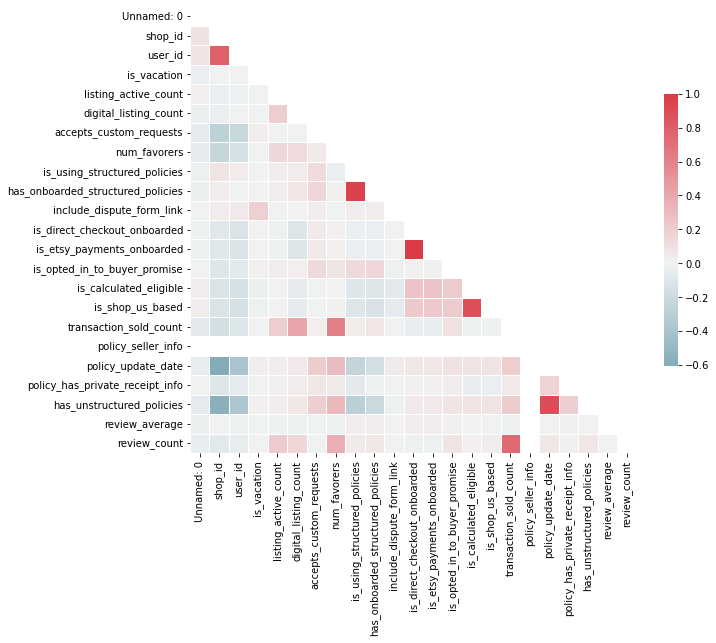

In [21]:
#looking for areas of strong correlation to dig into with deeper analysis
fig, ax = plt.subplots(figsize=(10, 10))
corr = all_df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap=cmap, mask = mask, center=0,
          square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [22]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3935 entries, 0 to 3934
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Unnamed: 0                         3935 non-null   int64         
 1   shop_id                            3935 non-null   int64         
 2   shop_name                          3935 non-null   object        
 3   user_id                            3935 non-null   int64         
 4   create_date                        3935 non-null   datetime64[ns]
 5   created_timestamp                  3935 non-null   datetime64[ns]
 6   title                              3604 non-null   object        
 7   announcement                       2538 non-null   object        
 8   currency_code                      3935 non-null   object        
 9   is_vacation                        3935 non-null   bool          
 10  vacation_message                   1

In [41]:
old_all_df = all_df.sort_values(by=['create_date'], ascending = True)
old_all_df.reset_index(drop=True)

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,vacation_message,sale_message,digital_sale_message,update_date,updated_timestamp,listing_active_count,digital_listing_count,login_name,accepts_custom_requests,vacation_autoreply,url,image_url_760x100,num_favorers,languages,icon_url_fullxfull,is_using_structured_policies,has_onboarded_structured_policies,include_dispute_form_link,is_direct_checkout_onboarded,is_etsy_payments_onboarded,is_opted_in_to_buyer_promise,is_calculated_eligible,is_shop_us_based,transaction_sold_count,shipping_from_country_iso,shop_location_country_iso,policy_welcome,policy_payment,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count
0,321,5116051,sugarloop,462,2005-09-23 08:54:52,2005-09-23 08:54:52,handmade stickers for the creative planner & j...,✦ Shipping with Tracking is available upon che...,NZD,False,"✧✧✧ Hello, I am on a short break ✧✧✧\r\n…an...",Hello :)\r\nThank you so much for your order -...,NaN,2022-06-21 06:20:58,2022-06-21 06:20:58,337,0,sugarloop,False,Hello :)\r\n\r\n&#39;So great to hear from you...,https://www.etsy.com/shop/sugarloop,NaN,19426,en-US,https://i.etsystatic.com/isla/1c9cec/52648844/...,True,True,False,True,True,True,False,False,53985,NZ,NZ,Welcome to my little corner of Etsy. Here you&...,SECURE OPTIONS\nEtsy keeps your payment inform...,PROCESSING TIME\nThe time I need to prepare an...,"I GLADLY ACCEPT RETURNS, EXCHANGES, AND CANCEL...",DO YOU PROVIDE TRACKING INFO?\nOrders are sent...,NaN,1652154646,False,True,NaN,4.9910,1111.0
1,180,5118278,Tsukiyono,6936,2005-10-22 23:26:09,2005-10-22 23:26:09,Amy Illustrates!,Welcome to my little shop at etsy! Please not...,USD,False,I&#39;m heading out to table in the artist all...,"Hi there,\r\nThank you for your purchase of on...",Digital downloads are instant and non-refundab...,2022-06-13 19:03:53,2022-06-13 19:03:53,29,3,Tsukiyono,False,"Hello, I am taking a short break to go table a...",https://www.etsy.com/shop/Tsukiyono,https://i.etsystatic.com/iusb/9561c4/28030428/...,331,en-US,https://i.etsystatic.com/isla/1cb904/28030262/...,False,False,False,True,True,False,True,True,225,NaN,US,Welcome to my etsy shop. I am both an illustr...,Payments are done through etsy&#39;s direct pa...,Shipping is done through the United State Post...,Returns are currently not allowed on any items...,If you have any questions or concerns please f...,NaN,1651280918,False,True,NaN,5.0000,28.0
2,1521,5129500,DawnEstelleDesigns,51242,2006-06-15 18:01:40,2006-06-15 18:01:40,"crafting supplies and handmade, hand picked fo...",Greetings!\r\n\r\nThank you for stopping by my...,USD,False,Thank you for stopping by my shop. \r\nI&#39;m...,Greetings!\r\nThank you for purchasing from my...,dawn estelle designs digital products Terms of...,2022-06-20 04:40:41,2022-06-20 04:40:41,96,7,DawnEstelleDesigns,True,Thank you for your note. \r\nMy shop is on a s...,https://www.etsy.com/shop/DawnEstelleDesigns,https://i.etsystatic.com/iusb/06e567/52044227/...,233,en-US,https://i.etsystatic.com/isla/579239/26132902/...,False,False,False,True,True,False,True,True,777,US,US,Welcome to my Etsy shop. Please convo me with ...,Payment is required at the time of purchase. I...,I use the U.S. Postal service for all of my sh...,All sales are final. If I make a mistake and i...,I want you to enjoy shopping with me and come ...,NaN,1652152828,False,True,NaN,4.8837,43.0
3,1071,5131987,meganlee,61796,2006-07-18 16:01:22,2006-07-18 16:01:22,"Science Art, Stickers, T-Shirts & STEM Gifts",NaN,USD,False,NaN,Thank you for supporting my work! Keep up with...,NaN,2022-06-20 00:00:33,2022-06-20 00:00:33,268,0,meganlee,True,NaN,https://www.etsy.com/shop/meganlee,https://i.etsystatic.com/iusb/8bfe7c/19435778/...,11372,en-US,https://i.etsystatic.com/isla/16033e/33579309/...,True,True,False,True,True,Tr

In [44]:
old_all_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3935 entries, 321 to 3909
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Unnamed: 0                         3935 non-null   int64         
 1   shop_id                            3935 non-null   int64         
 2   shop_name                          3935 non-null   object        
 3   user_id                            3935 non-null   int64         
 4   create_date                        3935 non-null   datetime64[ns]
 5   created_timestamp                  3935 non-null   datetime64[ns]
 6   title                              3604 non-null   object        
 7   announcement                       2538 non-null   object        
 8   currency_code                      3935 non-null   object        
 9   is_vacation                        3935 non-null   bool          
 10  vacation_message                  

In [51]:
select_columns = old_all_df[["shop_id", "shop_name", 'url', "create_date", 'create_date', 'num_favorers',
                      'transaction_sold_count', 'review_average', 'review_count' ]]
select_columns.reset_index(drop=True)
select_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3935 entries, 321 to 3909
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   shop_id                 3935 non-null   int64         
 1   shop_name               3935 non-null   object        
 2   url                     3935 non-null   object        
 3   create_date             3935 non-null   datetime64[ns]
 4   create_date             3935 non-null   datetime64[ns]
 5   num_favorers            3935 non-null   int64         
 6   transaction_sold_count  3935 non-null   int64         
 7   review_average          3098 non-null   float64       
 8   review_count            3098 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(2)
memory usage: 307.4+ KB


In [60]:
above_100 = select_columns[select_columns["review_count"] > 100]
above_100.reset_index(drop=True)

,shop_id,shop_name,url,create_date,create_date,num_favorers,transaction_sold_count,review_average,review_count
0,5116051,sugarloop,https://www.etsy.com/shop/sugarloop,2005-09-23 08:54:52,2005-09-23 08:54:52,19426,53985,4.9910,1111.0
1,5136616,CAprintables,https://www.etsy.com/shop/CAprintables,2006-09-06 04:00:18,2006-09-06 04:00:18,1016,6151,4.9529,191.0
2,5147375,CupcakesAndStickies,https://www.etsy.com/shop/CupcakesAndStickies,2007-01-05 00:50:37,2007-01-05 00:50:37,2627,13421,4.9677,186.0
3,5157128,SouthPacific,https://www.etsy.com/shop/SouthPacific,2007-03-06 04:00:26,2007-03-06 04:00:26,7855,41238,4.9369,396.0
4,5157400,LizzyClara,https://www.etsy.com/shop/LizzyClara,2007-03-07 22:24:25,2007-03-07 22:24:25,3358,7310,4.9657,321.0
...,...,...,...,...,...,...,...,...,...
801,32433825,PoppyAndMagnoliaCo,https://www.etsy.com/shop/PoppyAndMagnoliaCo,2021-11-04 03:49:56,2021-11-04 03:49:56,126,1022,4.9948,191.0
802,33237074,MulberryStPaperGoods,https://www.etsy.com/shop/MulberryStPaperGoods,2021-12-08 02:05:41,2021-12-08 02:05:41,203,9370,4.8936,592.0
803,34399588,EunoiaCraftUS,https://www.etsy.com/shop/EunoiaCraftUS,2022-02-12 20:37:12,2022-02-12 20:37:12,81,4667,4.7244,312.0
804,34669814,LemonSvgDesign,https://www.etsy.com/shop/LemonSvgDesign,2022-03-02 16:30:41,2022-03-02 16:30:41,48,1595,4.9153,118.0


In [61]:
#above_100.to_csv('above_100.csv')

In [29]:
old_shops.reset_index(drop=True)

,create_date,Date,Time
0,2005-09-23 08:54:52,2005-09-23,08:54:52
1,2005-10-22 23:26:09,2005-10-22,23:26:09
2,2006-06-15 18:01:40,2006-06-15,18:01:40
3,2006-07-18 16:01:22,2006-07-18,16:01:22
4,2006-09-06 04:00:18,2006-09-06,04:00:18
...,...,...,...
1495,2016-10-02 07:25:55,2016-10-02,07:25:55
1496,2016-10-02 15:58:25,2016-10-02,15:58:25
1497,2016-10-02 19:58:15,2016-10-02,19:58:15
1498,2016-10-03 15:56:45,2016-10-03,15:56:45


In [30]:
old_shops['Date'] = pd.to_datetime(old_shops['create_date']).dt.date
old_shops['Time'] = pd.to_datetime(old_shops['create_date']).dt.time

In [31]:
old_shops

,create_date,Date,Time
321,2005-09-23 08:54:52,2005-09-23,08:54:52
180,2005-10-22 23:26:09,2005-10-22,23:26:09
1521,2006-06-15 18:01:40,2006-06-15,18:01:40
2878,2006-07-18 16:01:22,2006-07-18,16:01:22
3447,2006-09-06 04:00:18,2006-09-06,04:00:18
...,...,...,...
1427,2016-10-02 07:25:55,2016-10-02,07:25:55
940,2016-10-02 15:58:25,2016-10-02,15:58:25
2857,2016-10-02 19:58:15,2016-10-02,19:58:15
1904,2016-10-03 15:56:45,2016-10-03,15:56:45


In [ ]:
old_shops.to_csv('old_shops_date.csv')

In [ ]:
all_df